# Profile

Nama: Austin Christian Yonatan 


---
## Import Library

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten

from google.colab import files
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [2]:

from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2260518649349027231
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4503806288007893285
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

---
## Data Loading

In [3]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paste kaggle.json ke folder kaggle 

!mkdir ./kaggle #buat folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move file kaggle.json ke folder kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json #perizinan akses, hanya pemilik file yang memiliki akses baca dan tulis ke file
!ls ~/.kaggle #cek list data yang ada di folder kaggle

kaggle.json


In [5]:
!kaggle datasets download -d preetviradiya/brian-tumor-dataset

 90% 97.0M/107M [00:03<00:00, 36.1MB/s]
100% 107M/107M [00:03<00:00, 34.3MB/s] 


In [6]:
!unzip -q /content/brian-tumor-dataset.zip -d images

In [7]:
os.listdir('/content/images/Brain Tumor Data Set/Brain Tumor Data Set')

['Brain Tumor', 'Healthy']

In [8]:
main_path= '/content/images/Brain Tumor Data Set/Brain Tumor Data Set'
num_tumor= len(os.listdir(os.path.join(main_path, 'Brain Tumor')))
num_healthy= len(os.listdir(os.path.join(main_path, 'Healthy')))

In [9]:
#cek berapa total file dalam masing masing folder
print(num_tumor)
print(num_healthy)

2513
2087


Dari pengecekan diatas terdapat 2513 file pada folder brain tumor dan 2087 file pada folder healthy

---
## EDA

Cek bagaimana gambar/image pada masing masing folder

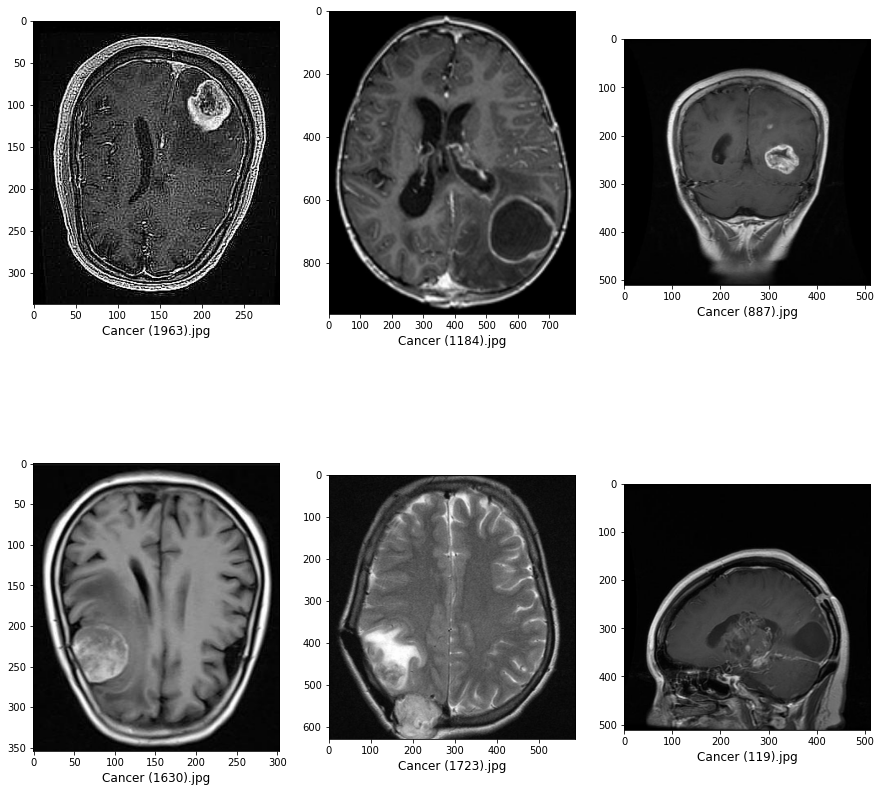

In [10]:
import random
fig = plt.figure(figsize=[15, 15])
fig.patch.set_facecolor('white')
for i in range(1, 7):
    plt.subplot(2, 3, i)
    random_pick = random.randint(1, 2000)
    random_im = str(random_pick)
    im = cv2.imread(main_path +'/Brain Tumor/Cancer (' + random_im + ').jpg')
    plt.imshow(im)
    plt.xlabel('Cancer (' + str(random_im) + ').jpg', fontsize=12)
plt.show()

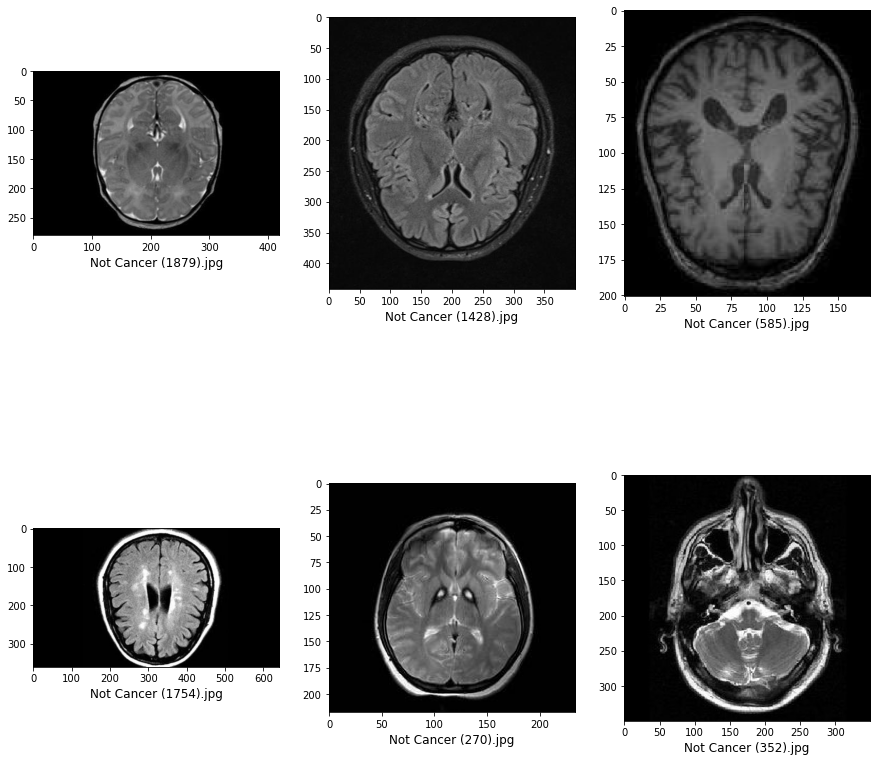

In [11]:
import random
fig = plt.figure(figsize=[15, 15])
fig.patch.set_facecolor('white')
for i in range(1, 7):
    plt.subplot(2, 3, i)
    random_pick = random.randint(1, 2000)
    random_im = str(random_pick)
    im = cv2.imread(main_path +'/Healthy/Not Cancer  (' + random_im + ').jpg')
    plt.imshow(im)
    plt.xlabel('Not Cancer (' + str(random_im) + ').jpg', fontsize=12)
plt.show()

Dari gambar diatas pada gambar yang memiliki tumor ada lingkaran pada gambar otak sendangkan pada otak yang sehat tidak ada

**Apakah pada file pada folder sudah dalam satu extension?**

In [12]:
# cek apakah file pada folder healthy memiliki extension selain .jpg
for file in os.listdir(main_path + '/Healthy'):
    if not file.endswith(".jpg"):
        print(file)
        print('There is that is not in jpg extension in healthy folder')
        break
# cek apakah file pada folder brain tumor memiliki extension selain .jpg      
for file in os.listdir(main_path + '/Brain Tumor'):
    if not file.endswith(".jpg"):
        print('There is that is not in jpg extension in Brain tumor folder')
        break

Not Cancer  (4).jpeg
There is that is not in jpg extension in healthy folder
There is that is not in jpg extension in Brain tumor folder


In [13]:
# cek ada berapa file untuk extension png tif, jpg, jpeg pada folder brain tumor
num_tumor_png= len(glob.glob(main_path + "/Brain Tumor/*.png"))
num_tumor_tif= len(glob.glob(main_path + "/Brain Tumor/*.tif"))
num_tumor_jpg= len(glob.glob(main_path + "/Brain Tumor/*.jpg"))
num_tumor_JPG= len(glob.glob(main_path + "/Brain Tumor/*.JPG"))
num_tumor_jpeg= len(glob.glob(main_path + "/Brain Tumor/*.jpeg"))
print('Pada folder brain tumor ada extension png sebanyak', num_tumor_png)
print('Pada folder brain tumor ada extension tif sebanyak', num_tumor_tif)
print('Pada folder brain tumor ada extension jpg sebanyak', num_tumor_jpg)
print('Pada folder brain tumor ada extension JPG sebanyak', num_tumor_JPG)
print('Pada folder brain tumor ada extension jpeg sebanyak', num_tumor_jpeg)
print('total', num_tumor_png+num_tumor_tif+num_tumor_jpg+num_tumor_JPG+num_tumor_jpeg)
print('*********************************************************************************')


# cek ada berapa file untuk extension png tif, jpg, jpeg pada folder healthy
num_healthy_png= len(glob.glob(main_path + "/Healthy/*.png"))
num_healthy_tif= len(glob.glob(main_path + "/Healthy/*.tif"))
num_healthy_jpg= len(glob.glob(main_path + "/Healthy/*.jpg"))
num_healthy_JPG= len(glob.glob(main_path + "/Healthy/*.JPG"))
num_healthy_jpeg= len(glob.glob(main_path + "/Healthy/*.jpeg"))
print('Pada folder healthy ada extension png sebanyak', num_healthy_png)
print('Pada folder healthy ada extension tif sebanyak', num_healthy_tif)
print('Pada folder healthy ada extension jpg sebanyak', num_healthy_jpg)
print('Pada folder healthy ada extension JPG sebanyak', num_healthy_JPG)
print('Pada folder healthy ada extension jpeg sebanyak', num_healthy_jpeg)
print('total', num_healthy_png+num_healthy_tif+num_healthy_jpg+num_healthy_JPG+num_healthy_jpeg)


Pada folder brain tumor ada extension png sebanyak 1
Pada folder brain tumor ada extension tif sebanyak 86
Pada folder brain tumor ada extension jpg sebanyak 2358
Pada folder brain tumor ada extension JPG sebanyak 68
Pada folder brain tumor ada extension jpeg sebanyak 0
total 2513
*********************************************************************************
Pada folder healthy ada extension png sebanyak 1
Pada folder healthy ada extension tif sebanyak 0
Pada folder healthy ada extension jpg sebanyak 2074
Pada folder healthy ada extension JPG sebanyak 6
Pada folder healthy ada extension jpeg sebanyak 6
total 2087


Agar semua data pada dataset dapat digunakan file akan diubah menjadi satu extension.  
Karena kebanyakan data merupakan file dengan extension .jpg maka data dengan extension lain akan diconvert menjadi .jpg. 

**convert file pada folder brain tumor**

In [14]:
#convert .png ke .jpg pada folder brain tumor
counter = 0
for image in glob.glob(main_path + "/Brain Tumor/*.png"):
    counter = counter + 1
    img = Image.open(image)
    img.save(main_path+'/Brain Tumor/'+ str(counter)+'Cancer.jpg')

In [15]:
#convert .jpeg ke .jpg pada folder brain tumor
counter = 0
for image in glob.glob(main_path + "/Brain Tumor/*.jpeg"):
    counter = counter + 1
    img = Image.open(image)
    img.save(main_path+'/Brain Tumor/'+ str(counter)+'Cancer1.jpg')

In [16]:
# convert .tif ke .jpg pada folder brain tumor
counter = 0
for image in glob.glob(main_path + "/Brain Tumor/*.tif"):
    counter = counter + 1
    img = Image.open(image)
    img.save(main_path+'/Brain Tumor/'+ str(counter)+'Cancer2.jpg')

In [17]:
# convert .JPG ke .jpg pada folder brain tumor
counter = 0
for image in glob.glob(main_path + "/Brain Tumor/*.JPG"):
    counter = counter + 1
    img = Image.open(image)
    img.save(main_path+'/Brain Tumor/'+ str(counter)+'Cancer3.jpg')

**convert file pada folder healthy**

In [18]:
#convert .png ke .jpg pada folder healty
counter = 0
for image in glob.glob(main_path + "/Healthy/*.png"):
    counter = counter + 1
    img = Image.open(image)
    img.save(main_path+'/Healthy/'+ str(counter)+'Healthy.jpg')

In [19]:
#convert .jpeg ke .jpg pada folder healty
counter = 0
for image in glob.glob(main_path + "/Healthy/*.jpeg"):
    counter = counter + 1
    img = Image.open(image)
    img.save(main_path+'/Healthy/'+ str(counter)+'Healthy1.jpg')

In [20]:
#convert .JPG ke .jpg pada folder healty
counter = 0
for image in glob.glob(main_path + "/Healthy/*.JPG"):
    counter = counter + 1
    img = Image.open(image)
    img.save(main_path+'/Healthy/'+ str(counter)+'Healthy2.jpg')

**Apakah semua file dalam rgb format?**

In [21]:
#cek ada image yang tidak rgb atau tidak di folder healhty
for image in glob.glob(main_path + "/Healthy/*.jpg"):
    i=cv2.imread(image)
    h, w, c= i.shape
    if c != 3:
        print ("in healthy folder there is file that not in rgb format")
        break
    else:
        print("in healthy folder all image file is in rgb format")
        break

#cek ada image yang tidak rgb atau tidak di folder Brain Tumor
for image in glob.glob(main_path + "/Brain Tumor/*.jpg"):
    i=cv2.imread(image)
    h, w, c= i.shape
    if c != 3:
        print ("in brain tumor folder there is file that not in rgb format")
        break
    else:
        print("in brain tumor folder all image file is in rgb format")
        break


in healthy folder all image file is in rgb format
in brain tumor folder all image file is in rgb format


semua file memiliki format rgb

---
## Preprocessing

Menentukan file mana yang healthy dan yang mana yang tumor

In [22]:
healthy= glob.glob(main_path + '/Healthy/*.jpg')
tumor= glob.glob(main_path + '/Brain Tumor/*.jpg')

*setelah saya pikir mungkin melakukan convert data menjadi extension .jpg tidak diperlukan/tidak penting karena untuk mengambil semua file pada folder dapat menggunakan code seperti line code dibawah:*

In [23]:
# alternatif untuk mengambil semua file pada folder tanpa mengubah file menjadi extension .jpg dapat menggunakan code seperti berikut:
#healthy= glob.glob(main_path + '/Healthy/*.*')
#tumor= glob.glob(main_path + '/Brain Tumor/*.*')

**Membuat dataframe**

In [24]:
# membuat dataframe
def create_dataframe(list_of_images):
  data=[]
  for image in list_of_images:
    data.append((image, image.split('/')[-2]))

  return pd.DataFrame(data, columns= ['images', 'label'])

df= create_dataframe(healthy + tumor)
#df= df.sample(frac=1, random_state=1).reset_index(drop=True)


In [25]:
print(df.shape)
df


(4600, 2)


,images,label
0,/content/images/Brain Tumor Data Set/Brain Tum...,Healthy
1,/content/images/Brain Tumor Data Set/Brain Tum...,Healthy
2,/content/images/Brain Tumor Data Set/Brain Tum...,Healthy
3,/content/images/Brain Tumor Data Set/Brain Tum...,Healthy
4,/content/images/Brain Tumor Data Set/Brain Tum...,Healthy
...,...,...
4595,/content/images/Brain Tumor Data Set/Brain Tum...,Brain Tumor
4596,/content/images/Brain Tumor Data Set/Brain Tum...,Brain Tumor
4597,/content/images/Brain Tumor Data Set/Brain Tum...,Brain Tumor
4598,/content/images/Brain Tumor Data Set/Brain Tum...,Brain Tumor


**Split data menjadi train, validation dan test**

In [26]:
#split data menjadi train, validation dan test
train_df_full, test_df= train_test_split(df, test_size=0.2, random_state=5)
train_df, val_df= train_test_split(train_df_full, test_size=0.2, random_state=5)

print(test_df.shape)
print(train_df.shape)
print(val_df.shape)

(920, 2)
(2944, 2)
(736, 2)


**Augmentasi Data**  
Pada augmentasi data saya hanya melakukan rescale, zoom dan horizontal dan vertical flip.  
Karena menurut saya gambar MRI atau Xray otak itu hasilnya pasti ditengah dan tidak akan berputar sehingga saya tidak melakukan augmentasi dengan shear, rotation, width shift dan height shift, dan hanya melakukan rescale, zoom, horizontal flip dan vertical flip

In [27]:
# Augmentasi data
train_augmented= ImageDataGenerator(
    rescale= 1./255,
    zoom_range= 0.2,
    horizontal_flip= True,
    vertical_flip=True
)

val_augmented= ImageDataGenerator(rescale= 1./255)
test_augmented= ImageDataGenerator(rescale= 1./255)


In [28]:
train_data= train_augmented.flow_from_dataframe(
    dataframe= train_df,
    x_col= 'images',
    y_col= 'label',
    target_size= (256,256),
    class_mode= 'binary',
    batch_size= 64,
    shuffle= False,
    seed= 5
)

val_data= val_augmented.flow_from_dataframe(
    dataframe= val_df,
    x_col= 'images',
    y_col= 'label',
    target_size= (256,256),
    class_mode= 'binary',
    batch_size= 64,
    shuffle= False,
    seed= 5
)

test_data= test_augmented.flow_from_dataframe(
    dataframe= test_df,
    x_col= 'images',
    y_col= 'label',
    target_size= (256,256),
    class_mode= 'binary',
    batch_size= 64,
    shuffle= False,
    seed= 5
)


Found 2944 validated image filenames belonging to 2 classes.
Found 736 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


Cek class pada data

In [29]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

Membuat Callback dengan model checkpoint dan earlystopping.  
callback model checkpoint digunakan untuk menyimpan model pada epoch terbaik, dan earlystopping digunakan untuk menghentikan epoch pada kasus ini saya menggunakan earlystopping untuk menghentikan epoch jika val_loss tidak turun dalam 3 epoch terakhir

In [30]:
callbacks= [
            ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only= True),
            EarlyStopping(monitor= 'val_loss', mode='min', patience= 3, verbose=1),
]

## Model Definition

Disini saya mencoba membuat model dengan 2 layer convolusi dan tiap convolusi dilakukan pooling, dan 2 hidden layer dengan neuron layer pertama 128 dan layer ke-dua sebanyak 64 neuron.  
Dimana layer convolusi digunakan agar model dapat mengenali pattern pada gambar.  
Pada model ini saya menggunakan activation yang paling populer terlebih dahulu yaitu relu untuk tiap layer kecuali output layer, dimana untuk layer output saya menggunakan activation sigmoid karena kasus ini merupakan klasifikasi dengan 2 label, dan karena output dari activation sigmoid merupakan nilai antara 0 dan 1 sehingga lebih cocok untuk digunakan dalam kasus binary classification.

In [31]:
input= [256,256,3]
#Conv ke 1
model= Sequential()
model.add(Conv2D(filters=8, kernel_size=3, activation= 'relu', input_shape= input))
model.add(MaxPooling2D(pool_size=2, strides=2))

#Conv ke 2
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= input))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [32]:
model.compile(loss= 'binary_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics= ['accuracy'])

In [33]:
# train
history = model.fit(train_data,batch_size=64, epochs=20, validation_data=val_data, callbacks= callbacks, verbose=1)

Epoch 1/20
46/46 [==============================] - 64s 1s/step - loss: 0.6955 - accuracy: 0.6219 - val_loss: 0.5591 - val_accuracy: 0.7636
Epoch 2/20
46/46 [==============================] - 45s 975ms/step - loss: 0.5420 - accuracy: 0.7412 - val_loss: 0.4763 - val_accuracy: 0.7636
Epoch 3/20
46/46 [==============================] - 46s 1s/step - loss: 0.4684 - accuracy: 0.7846 - val_loss: 0.3948 - val_accuracy: 0.8193
Epoch 4/20
46/46 [==============================] - 46s 1s/step - loss: 0.4317 - accuracy: 0.8077 - val_loss: 0.3574 - val_accuracy: 0.8329
Epoch 5/20
46/46 [==============================] - 45s 969ms/step - loss: 0.3933 - accuracy: 0.8251 - val_loss: 0.4144 - val_accuracy: 0.7948
Epoch 6/20
46/46 [==============================] - 45s 973ms/step - loss: 0.4089 - accuracy: 0.8190 - val_loss: 0.3001 - val_accuracy: 0.8709
Epoch 7/20
46/46 [==============================] - 45s 968ms/step - loss: 0.3736 - accuracy: 0.8329 - val_loss: 0.3245 - val_accuracy: 0.8601
Epoch 8/

membuat dataframe dari hasil epoch base model

In [34]:
metrics_model = pd.DataFrame(history.history)
metrics_model.tail()

,loss,accuracy,val_loss,val_accuracy
12,0.273544,0.885870,0.247205,0.902174
13,0.245464,0.899796,0.187110,0.922554
14,0.252733,0.898098,0.187191,0.919837
15,0.216880,0.913043,0.203260,0.918478
16,0.220475,0.908967,0.191529,0.919837


plot hasil epoch base model

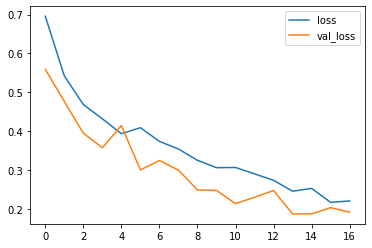

In [35]:
metrics_model[['loss', 'val_loss']].plot()

## Model Evaluation

In [36]:
label = {'Brain Tumor': 0, 'Healthy' : 1}
y_test = test_df['label'].copy().map(label).astype('int')

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
threshold=0.5
y_pred = model.predict(test_data)
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       496
           1       0.92      0.90      0.91       424

    accuracy                           0.92       920
   macro avg       0.92      0.92      0.92       920
weighted avg       0.92      0.92      0.92       920



In [38]:
train_data.class_indices


{'Brain Tumor': 0, 'Healthy': 1}

In [39]:
evaluation=model.evaluate(test_data)
print('test loss', evaluation[0])
print('test accuracy', evaluation[1])

15/15 [==============================] - 3s 196ms/step - loss: 0.1915 - accuracy: 0.9185
test loss 0.19147978723049164
test accuracy 0.91847825050354


Pada kasus ini saya lebih mementingkan recall ketika 0 sebagai positif yang tinggi dan precision ketika 1 sebagai positif yang tinggi, dimana 0 merupakan brain tumor dan 1 merupakan healthy. karena dalam kasus ini akan lebih berbahaya jika model memprediksi gambar tersebut merupakan healthy padahal pada gambar tersebut terdapat brain tumor.  
Sehingga dilihat dari hasil evaluasi model, model ini cukup baik karena memiliki recall 0 sebesar 0.93 dan precision 1 sebesar 0.92 dengan test loss 0.19.

## Model Improvement

Karena menurut saya base model masih dapat di-improve, disini saya mencoba untuk meng-improve model. Awalnya saya mencoba untuk mengurangi layer convolusi dan hidden layer untuk melihat pengaruhnya pada model

In [40]:
input= [256,256,3]
#Conv ke 1
model2= Sequential()
model2.add(Conv2D(filters=8, kernel_size=3, activation= 'relu', input_shape= input))
model2.add(MaxPooling2D(pool_size=2, strides=2))


model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation= 'sigmoid'))

In [41]:
model2.compile(loss= 'binary_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics= ['accuracy'])

In [42]:
# train
history2 = model2.fit(train_data,batch_size=64, epochs=20, validation_data=val_data, callbacks= callbacks, verbose=1)

Epoch 1/20
46/46 [==============================] - 45s 965ms/step - loss: 1.5272 - accuracy: 0.5550 - val_loss: 0.6312 - val_accuracy: 0.5978
Epoch 2/20
46/46 [==============================] - 46s 982ms/step - loss: 0.6192 - accuracy: 0.6495 - val_loss: 0.5349 - val_accuracy: 0.7554
Epoch 3/20
46/46 [==============================] - 44s 964ms/step - loss: 0.5835 - accuracy: 0.7024 - val_loss: 0.5241 - val_accuracy: 0.7568
Epoch 4/20
46/46 [==============================] - 44s 961ms/step - loss: 0.5577 - accuracy: 0.7289 - val_loss: 0.5141 - val_accuracy: 0.7378
Epoch 5/20
46/46 [==============================] - 44s 954ms/step - loss: 0.5155 - accuracy: 0.7609 - val_loss: 0.4685 - val_accuracy: 0.7962
Epoch 6/20
46/46 [==============================] - 44s 961ms/step - loss: 0.4863 - accuracy: 0.7779 - val_loss: 0.4265 - val_accuracy: 0.8084
Epoch 7/20
46/46 [==============================] - 44s 966ms/step - loss: 0.4595 - accuracy: 0.7948 - val_loss: 0.3972 - val_accuracy: 0.8329

In [43]:
metrics_model2 = pd.DataFrame(history2.history)
metrics_model2.tail()

,loss,accuracy,val_loss,val_accuracy
13,0.402471,0.833220,0.386216,0.842391
14,0.393850,0.833899,0.318749,0.869565
15,0.375814,0.841712,0.364528,0.838315
16,0.383292,0.837976,0.321680,0.854620
17,0.388213,0.831522,0.359218,0.842391


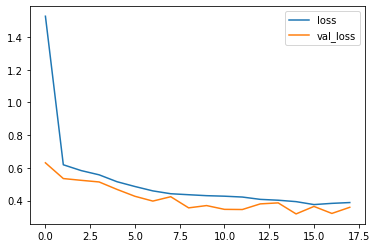

In [44]:
metrics_model2[['loss', 'val_loss']].plot()

### Model Evaluation (model improved)

In [45]:
threshold=0.5
y_pred2 = model2.predict(test_data)
y_pred2 = np.where(y_pred2 >= threshold, 1, 0)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       496
           1       0.94      0.69      0.80       424

    accuracy                           0.84       920
   macro avg       0.86      0.83      0.83       920
weighted avg       0.86      0.84      0.83       920



In [46]:
evaluation=model2.evaluate(test_data)
print('test loss', evaluation[0])
print('test accuracy', evaluation[1])

15/15 [==============================] - 3s 192ms/step - loss: 0.3855 - accuracy: 0.8370
test loss 0.3855222165584564
test accuracy 0.8369565010070801


Dari hasil evaluasi model, model ini ternyata recall dan precision yang menjadi target saya naik sekitar 3% dan 2% namun yang lainnya turun drastis, menurut saya model ini masih kurang baik karena walaupun jika orang tersebut sehat tetapi diprediksi tumor tidak sefatal sebaliknya, hal ini tetap merugikan orang tersebut karena untuk cost dari obat obatan tumor tinggi

### Model improve ke 2  


Dilihat dari kedua model diatas saya mencoba untuk meng-improve model lagi. disini saya mencoba untuk menambah layer convolusi dan hidden layer dan pada hidden layer saya berikan dropout dengan rate 0.2 

In [47]:
input= [256,256,3]
#Conv ke 1
model3= Sequential()
model3.add(Conv2D(filters=8, kernel_size=3, activation= 'relu', input_shape= input))
model3.add(MaxPooling2D(pool_size=2, strides=2))
#Conv ke 2
model3.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= input))
model3.add(MaxPooling2D(pool_size=2, strides=2))
#conv 3
model3.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= input))
model3.add(MaxPooling2D(pool_size=2, strides=2))

model3.add(Flatten())
#hidden layer 1
model3.add(Dense(128, activation= 'relu'))
model3.add(tf.keras.layers.Dropout(rate=0.2))
#hidden layer 2
model3.add(Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.2))
#hidden layer 3
model3.add(Dense(16, activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.2))
#output layer
model3.add(Dense(1, activation= 'sigmoid'))

In [48]:
model3.compile(loss= 'binary_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics= ['accuracy'])

In [49]:
# train
history3 = model3.fit(train_data,batch_size=64, epochs=20, validation_data=val_data, callbacks= callbacks, verbose=1)

Epoch 1/20
46/46 [==============================] - 46s 974ms/step - loss: 0.6890 - accuracy: 0.5635 - val_loss: 0.6021 - val_accuracy: 0.6495
Epoch 2/20
46/46 [==============================] - 44s 963ms/step - loss: 0.6218 - accuracy: 0.6501 - val_loss: 0.4667 - val_accuracy: 0.7989
Epoch 3/20
46/46 [==============================] - 44s 966ms/step - loss: 0.5370 - accuracy: 0.7429 - val_loss: 0.4706 - val_accuracy: 0.8030
Epoch 4/20
46/46 [==============================] - 44s 965ms/step - loss: 0.4857 - accuracy: 0.7812 - val_loss: 0.4104 - val_accuracy: 0.8410
Epoch 5/20
46/46 [==============================] - 44s 966ms/step - loss: 0.4966 - accuracy: 0.7751 - val_loss: 0.3588 - val_accuracy: 0.8438
Epoch 6/20
46/46 [==============================] - 45s 987ms/step - loss: 0.4615 - accuracy: 0.7891 - val_loss: 0.3788 - val_accuracy: 0.8451
Epoch 7/20
46/46 [==============================] - 44s 966ms/step - loss: 0.3966 - accuracy: 0.8373 - val_loss: 0.3547 - val_accuracy: 0.8438

In [50]:
metrics_model3 = pd.DataFrame(history3.history)
metrics_model3.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.272627,0.885190,0.184476,0.941576
16,0.256365,0.901155,0.189507,0.923913
17,0.243380,0.897079,0.203665,0.919837
18,0.230408,0.916101,0.150129,0.945652
19,0.229125,0.909307,0.169184,0.942935


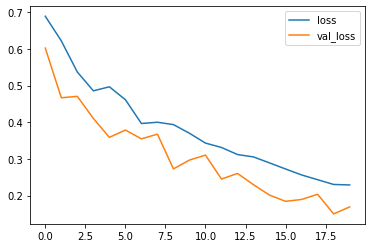

In [51]:
metrics_model3[['loss', 'val_loss']].plot()

### Model Evaluation (model improved 2)

In [52]:
threshold=0.5
y_pred3 = model3.predict(test_data)
y_pred3 = np.where(y_pred3 >= threshold, 1, 0)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       496
           1       0.93      0.93      0.93       424

    accuracy                           0.94       920
   macro avg       0.94      0.94      0.94       920
weighted avg       0.94      0.94      0.94       920



In [53]:
evaluation=model3.evaluate(test_data)
print('test loss', evaluation[0])
print('test accuracy', evaluation[1])

15/15 [==============================] - 3s 192ms/step - loss: 0.1764 - accuracy: 0.9391
test loss 0.17635269463062286
test accuracy 0.939130425453186


Dari evaluasi model improve ke-2, model ini memiliki nilai presisi 1 dan recall 0 yang lebih baik 1% dari base model, dan model ini juga memiliki nilai lainnya yang lebih baik dibanding ke-2 model yang sebelumnya.

### model improve 3

Dilihat dari hasil model improve ke2 yang semakin baik dengan penambahan layer, saya mencoba untuk menambahkan lagi layer convolusi dan hidden layer 

In [55]:
input= [256,256,3]
#Conv ke 1
model4= Sequential()
model4.add(Conv2D(filters=8, kernel_size=3, activation= 'relu', input_shape= input))
model4.add(MaxPooling2D(pool_size=2, strides=2))
#Conv ke 2
model4.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= input))
model4.add(MaxPooling2D(pool_size=2, strides=2))
#conv 3
model4.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= input))
model4.add(MaxPooling2D(pool_size=2, strides=2))

#conv 4
model4.add(Conv2D(filters=64, kernel_size=3, activation= 'relu', input_shape= input))
model4.add(MaxPooling2D(pool_size=2, strides=2))

model4.add(Flatten())
model4.add(Dense(128, activation= 'relu'))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(Dense(32, activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(Dense(16, activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(Dense(4, activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(Dense(1, activation= 'sigmoid'))

In [56]:
model4.compile(loss= 'binary_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics= ['accuracy'])

In [57]:
# train
history4 = model4.fit(train_data,batch_size=64, epochs=20, validation_data=val_data, callbacks= callbacks, verbose=1)

Epoch 1/20
46/46 [==============================] - 45s 969ms/step - loss: 0.6801 - accuracy: 0.5608 - val_loss: 0.6124 - val_accuracy: 0.7174
Epoch 2/20
46/46 [==============================] - 44s 957ms/step - loss: 0.6355 - accuracy: 0.6566 - val_loss: 0.4818 - val_accuracy: 0.7826
Epoch 3/20
46/46 [==============================] - 49s 1s/step - loss: 0.5629 - accuracy: 0.7289 - val_loss: 0.4338 - val_accuracy: 0.8315
Epoch 4/20
46/46 [==============================] - 44s 959ms/step - loss: 0.5091 - accuracy: 0.7653 - val_loss: 0.3517 - val_accuracy: 0.8533
Epoch 5/20
46/46 [==============================] - 53s 1s/step - loss: 0.4708 - accuracy: 0.7979 - val_loss: 0.3139 - val_accuracy: 0.8655
Epoch 6/20
46/46 [==============================] - 44s 962ms/step - loss: 0.4364 - accuracy: 0.8030 - val_loss: 0.2724 - val_accuracy: 0.8872
Epoch 7/20
46/46 [==============================] - 45s 971ms/step - loss: 0.3945 - accuracy: 0.8268 - val_loss: 0.3517 - val_accuracy: 0.8152
Epoch

In [58]:
metrics_model4 = pd.DataFrame(history4.history)
metrics_model4.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.262928,0.901834,0.152194,0.953804
16,0.229881,0.913723,0.113377,0.957880
17,0.203701,0.918478,0.142782,0.951087
18,0.205775,0.920516,0.163700,0.948370
19,0.197153,0.919497,0.148676,0.953804


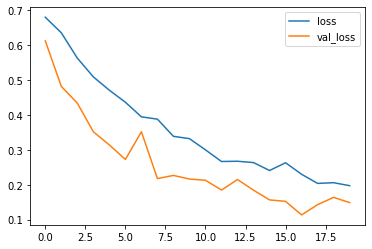

In [59]:
metrics_model4[['loss', 'val_loss']].plot()

### Model Evaluation (model improved 3) 

In [60]:
threshold=0.5
y_pred4 = model4.predict(test_data)
y_pred4 = np.where(y_pred4 >= threshold, 1, 0)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       496
           1       0.95      0.93      0.94       424

    accuracy                           0.94       920
   macro avg       0.95      0.94      0.94       920
weighted avg       0.94      0.94      0.94       920



In [61]:
evaluation=model4.evaluate(test_data)
print('test loss', evaluation[0])
print('test accuracy', evaluation[1])

15/15 [==============================] - 3s 190ms/step - loss: 0.1557 - accuracy: 0.9446
test loss 0.1557464301586151
test accuracy 0.9445652365684509


Hasil model improve ke-3 ini lebih baik dari model model sebelumnya dapat dilihat dari precision 1 dan recall 0 yang lebih dari samadengan 0.95 dan juga untuk precision dan recall lainnya tinggi

### Model Saving

karena saya menggunakan callback modelcheckpoint. model terbaik telah disimpan dengan nama model_best.hdf5 

## Model Inference

In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

Saving download.jfif to download.jfif


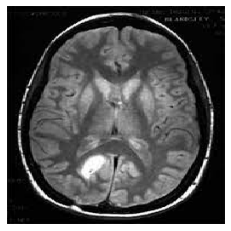

[[0.]]
Brain Tumor


In [62]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
 
  # Prediksi dengan mengunggah gambar
  path = fn
  img = image.load_img(path, target_size=(256,256))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = np.array(img) # untuk ubah image kedalam array
  x = np.expand_dims(x, axis=0) #Memperluas bentuk array misal 1D jadi 2D, 0 berarti baris/horizontal [[1, 2]]

  images = np.vstack([x])
  classes = model4.predict(images) #gunakan model yang terbaik untuk predict images
  print(classes) 
  if classes[0][0] == 1:
    print('Healthy')
  else:
    print('Brain Tumor')

Saving normal2.jfif to normal2.jfif


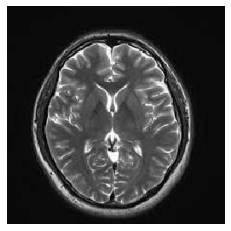

[[1.]]
Healthy


In [63]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(256,256))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img) 
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model4.predict(images)
  print(classes) 
  if classes[0][0] == 1:
    print('Healthy')
  else:
    print('Brain Tumor')

## Kesimpulan

- Dari EDA, file yang didapat dari kaggle ini semuanya dalam format RGB
- Dari EDA, gambar untuk otak yang terdapat tumor ada seperti lingkaran pada otaknya
- Model yang di-improve cukup baik dengan presisi ketika healthy sebagai positif sebesar 0.95 dan recall ketika brain tumor sebagai positif sebesar 0.96
- Untuk kedepannya mungkin model dapat diimprove lagi dengan mengubah activation layernya, dan/atau initializer, dan/atau optimizernya
- Dibawah saya telah mencoba untuk optimizer adamax dengan arsitektur model seperti pada model improvement terakhir, hasilnya tidak lebih baik dibanding dengan dengan model improvement terakhir


## Tes optimizer adamax

In [64]:
input= [256,256,3]
#Conv ke 1
model5= Sequential()
model5.add(Conv2D(filters=8, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))
#Conv ke 2
model5.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))
#conv 3
model5.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))

#conv 4
model5.add(Conv2D(filters=64, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))

model5.add(Flatten())
model5.add(Dense(128, activation= 'relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(32, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(16, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(4, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(1, activation= 'sigmoid'))

In [65]:
model5.compile(loss= 'binary_crossentropy',optimizer=tf.keras.optimizers.Adamax(), metrics= ['accuracy'])

In [66]:
# train
history5 = model5.fit(train_data,batch_size=64, epochs=20, validation_data=val_data, verbose=1)

Epoch 1/20
46/46 [==============================] - 46s 981ms/step - loss: 0.6872 - accuracy: 0.5445 - val_loss: 0.6656 - val_accuracy: 0.6264
Epoch 2/20
46/46 [==============================] - 45s 970ms/step - loss: 0.6677 - accuracy: 0.5866 - val_loss: 0.6179 - val_accuracy: 0.6807
Epoch 3/20
46/46 [==============================] - 45s 972ms/step - loss: 0.6323 - accuracy: 0.6257 - val_loss: 0.5368 - val_accuracy: 0.7935
Epoch 4/20
46/46 [==============================] - 45s 981ms/step - loss: 0.6090 - accuracy: 0.6566 - val_loss: 0.5113 - val_accuracy: 0.8071
Epoch 5/20
46/46 [==============================] - 44s 962ms/step - loss: 0.6055 - accuracy: 0.6654 - val_loss: 0.4943 - val_accuracy: 0.8111
Epoch 6/20
46/46 [==============================] - 52s 1s/step - loss: 0.5723 - accuracy: 0.7058 - val_loss: 0.4469 - val_accuracy: 0.8234
Epoch 7/20
46/46 [==============================] - 46s 1s/step - loss: 0.5634 - accuracy: 0.7062 - val_loss: 0.4180 - val_accuracy: 0.8193
Epoch

In [67]:
metrics_model5 = pd.DataFrame(history5.history)
metrics_model5.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.459331,0.788383,0.372723,0.853261
16,0.444505,0.777853,0.341648,0.873641
17,0.435710,0.795177,0.364845,0.843750
18,0.426135,0.801630,0.309812,0.879076
19,0.429440,0.796875,0.323933,0.870924


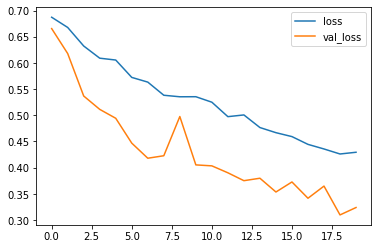

In [68]:
metrics_model5[['loss', 'val_loss']].plot()

In [69]:
threshold=0.5
y_pred5 = model5.predict(test_data)
y_pred5 = np.where(y_pred5 >= threshold, 1, 0)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       496
           1       0.91      0.78      0.84       424

    accuracy                           0.86       920
   macro avg       0.87      0.86      0.86       920
weighted avg       0.87      0.86      0.86       920



## Test optimizer nadam

In [70]:
input= [256,256,3]
#Conv ke 1
model5= Sequential()
model5.add(Conv2D(filters=8, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))
#Conv ke 2
model5.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))
#conv 3
model5.add(Conv2D(filters=32, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))

#conv 4
model5.add(Conv2D(filters=64, kernel_size=3, activation= 'relu', input_shape= input))
model5.add(MaxPooling2D(pool_size=2, strides=2))

model5.add(Flatten())
model5.add(Dense(128, activation= 'relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(32, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(16, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(4, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(Dense(1, activation= 'sigmoid'))

In [71]:
model5.compile(loss= 'binary_crossentropy',optimizer=tf.keras.optimizers.Nadam(), metrics= ['accuracy'])

In [72]:
# train
history5 = model5.fit(train_data,batch_size=64, epochs=20, validation_data=val_data, verbose=1)

Epoch 1/20
46/46 [==============================] - 46s 965ms/step - loss: 0.6821 - accuracy: 0.5543 - val_loss: 0.5885 - val_accuracy: 0.6698
Epoch 2/20
46/46 [==============================] - 45s 969ms/step - loss: 0.6435 - accuracy: 0.6369 - val_loss: 0.5354 - val_accuracy: 0.7880
Epoch 3/20
46/46 [==============================] - 44s 960ms/step - loss: 0.5931 - accuracy: 0.6831 - val_loss: 0.4925 - val_accuracy: 0.8207
Epoch 4/20
46/46 [==============================] - 44s 959ms/step - loss: 0.5639 - accuracy: 0.7123 - val_loss: 0.4950 - val_accuracy: 0.7595
Epoch 5/20
46/46 [==============================] - 44s 961ms/step - loss: 0.5255 - accuracy: 0.7221 - val_loss: 0.3925 - val_accuracy: 0.8587
Epoch 6/20
46/46 [==============================] - 45s 981ms/step - loss: 0.4885 - accuracy: 0.7514 - val_loss: 0.3299 - val_accuracy: 0.8750
Epoch 7/20
46/46 [==============================] - 44s 959ms/step - loss: 0.4594 - accuracy: 0.7595 - val_loss: 0.3200 - val_accuracy: 0.8777

In [73]:
metrics_model5 = pd.DataFrame(history5.history)
metrics_model5.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.241069,0.918478,0.137987,0.951087
16,0.240206,0.918139,0.132716,0.957880
17,0.222166,0.933424,0.110724,0.957880
18,0.227892,0.929008,0.094503,0.967391
19,0.203902,0.943274,0.143962,0.951087


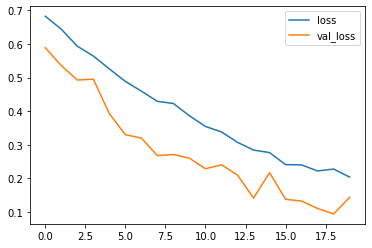

In [74]:
metrics_model5[['loss', 'val_loss']].plot()

model evaluation

In [75]:
threshold=0.5
y_pred5 = model5.predict(test_data)
y_pred5 = np.where(y_pred5 >= threshold, 1, 0)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       496
           1       0.97      0.92      0.95       424

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920



**awalnya model ini sedikit lebih buruk dibanding dengan model improvement terakhir. Namun setelah notebook di-run ulang hasilnya lebih baik dibanding dengan model improvement terakhir, sehingga model ini juga saya simpan**

In [77]:
model5.save('model_nadam.hdf5')

model inference

Saving download.jfif to download (1).jfif


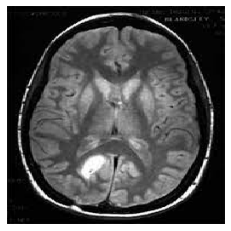

[[0.]]
Brain Tumor


In [78]:
uploaded = files.upload()
model_nadam= tf.keras.models.load_model("model_nadam.h5")
for fn in uploaded.keys():
 
  # Prediksi dengan mengunggah gambar
  path = fn
  img = image.load_img(path, target_size=(256,256))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img) # untuk ubah image kedalam array
  x = np.expand_dims(x, axis=0) #Memperluas bentuk array misal 1D jadi 2D, 0 berarti baris/horizontal [[1, 2]]

  images = np.vstack([x])
  classes = model_nadam.predict(images) #gunakan model yang terbaik untuk predict images
  print(classes) 
  if classes[0][0] == 1:
    print('Healthy')
  else:
    print('Brain Tumor')